In [1]:
import os
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df_cleaned = pd.read_csv("../Data/CleanedData.csv")

In [3]:
df_cleaned = df_cleaned.drop(columns=["Unnamed: 0"])
df_cleaned

,CPI,Unemployment Rate,Fed Funds Rate,M2 Money Supply,day_diff
0,169.300,4.0,5.45,4667.6,-1.792515
1,169.300,4.0,5.45,4667.6,-2.409937
2,169.300,4.0,5.45,4667.6,0.039834
3,169.300,4.0,5.45,4667.6,-1.195010
4,169.300,4.0,5.45,4667.6,3.465529
...,...,...,...,...,...
6304,317.685,4.1,4.48,21533.8,4.559998
6305,317.685,4.1,4.48,21533.8,3.900024
6306,317.685,4.1,4.48,21533.8,-1.909973
6307,317.685,4.1,4.48,21533.8,1.079956


In [4]:
X = df_cleaned.drop(columns=['day_diff'])
y = df_cleaned['day_diff']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.reshape(
    (X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(64, input_shape=(
    X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

/Users/andrew/Desktop/Projects/MarketPredictor/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(X_train, y_train, epochs=100,
                    batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0108 - val_loss: 0.8908
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 1.0913 - val_loss: 0.8832
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 1.0026 - val_loss: 0.8846
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0215 - val_loss: 0.8831
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9664 - val_loss: 0.8875
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0446 - val_loss: 0.8845
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.9432 - val_loss: 0.8850
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 1.0644 - val_loss: 0.8846
Epoch 9/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0327 - val_loss: 0.8848
Epoch 10/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9954 - val_loss: 0.8839
Epoch 11/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0591 - val_loss: 0.8837
Epoch 12/100
158/158 ━━━━━━━━━━

In [7]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.7810
Test Loss: 0.8852792382240295


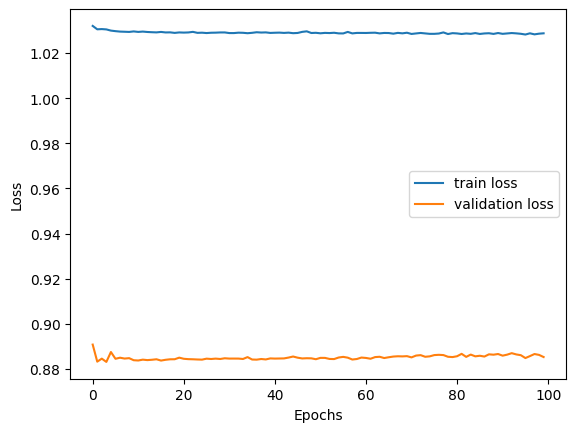

In [8]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
predictions = model.predict(X_test)

print(predictions[:5])
print(y_test[:5])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[-0.01443668]
 [ 0.00817867]
 [-0.0227196 ]
 [-0.03964511]
 [-0.0173294 ]]
[ 0.08035845 -0.64138805  0.34395367 -0.10293707 -1.56222454]
